<span style="font-size:60px; text-align: center; display: block;"><b>Plan de Trabajo - Proyecto Interconnect</b></span>

# Contextualización del Problema

- La operadora Interconnect necesita predecir la rotación de clientes.
- El objetivo es identificar clientes propensos a cambiar de operadora para ofrecer promociones/planes especiales.
- Los datos incluyen información personal y contractual de los clientes.

# Etapas del Proyecto
## Preparación y Análisis de Datos

- Importar datos de diferentes fuentes (contract.csv, personal.csv, internet.csv, phone.csv).
- Analizar valores ausentes y duplicados.
- Realizar análisis exploratorio de datos (EDA).
- Verificar correlaciones entre variables.
- Identificar patrones relevantes para la rotación de clientes.

## Preprocesamiento

- Tratar valores ausentes y duplicados.
- Codificar variables categóricas.
- Normalizar/estandarizar datos numéricos.
- Unificar los datos de las diferentes fuentes (contract.csv, personal.csv, internet.csv, phone.csv).
- Separar características y objetivo (target).
- Dividir los datos en conjuntos de entrenamiento y prueba.

## Modelado

- Probar diferentes algoritmos de clasificación (por ejemplo: Árbol de Decisión, Random Forest, Regresión Logística).
- Realizar validación cruzada.
- Ajustar hiperparámetros de los modelos.
- Evaluar el rendimiento utilizando AUC-ROC como métrica principal.
- Comparar resultados entre modelos.

## Evaluación y Optimización

- Analizar métricas de desempeño (AUC-ROC, Precisión).
- Identificar las características más importantes.
- Optimizar el modelo con mejor rendimiento.
- Validar si cumple con el criterio AUC-ROC ≥ 0.75.

## Documentación e Informe

- Documentar todas las etapas realizadas.
- Presentar análisis e insights obtenidos.
- Describir la metodología utilizada.
- Presentar resultados y conclusiones.
- Hacer recomendaciones para la implementación.

# Criterios de Éxito

- AUC-ROC mínimo de 0.75.
- Precisión como métrica secundaria.
- Modelo interpretable e implementable.
- Documentación clara y completa.

<b>Bibliotecas</b>

In [1]:
# Importando bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import warnings

<span style="font-size:20px"><b>Preparación y Análisis de Datos:</b></span>

In [2]:
# Definiendo las rutas de los archivos
path_contract = 'final_provider/contract.csv'
path_internet = 'final_provider/internet.csv'
path_personal = 'final_provider/personal.csv'
path_phone = 'final_provider/phone.csv'

# Importando los datos
df_contract = pd.read_csv(path_contract)
df_internet = pd.read_csv(path_internet)
df_personal = pd.read_csv(path_personal)
df_phone = pd.read_csv(path_phone)

# Análisis inicial de cada DataFrame
print("\nAnálisis del DataFrame Contract:\n")
print(df_contract.info())
print("\nPrimeras filas:")
print(df_contract.head())
print("\nValores ausentes:")
print(df_contract.isna().sum())
print("\nValores duplicados:")
print(df_contract.duplicated().sum())
print("-" * 100)

print("\nAnálisis del DataFrame Internet:\n")
print(df_internet.info())
print("\nPrimeras filas:")
print(df_internet.head())
print("\nValores ausentes:")
print(df_internet.isna().sum())
print("\nValores duplicados:")
print(df_internet.duplicated().sum())
print("-" * 100)

print("\nAnálisis del DataFrame Personal:\n")
print(df_personal.info())
print("\nPrimeras filas:")
print(df_personal.head())
print("\nValores ausentes:")
print(df_personal.isna().sum())
print("\nValores duplicados:")
print(df_personal.duplicated().sum())
print("-" * 100)

print("\nAnálisis del DataFrame Phone:\n")
print(df_phone.info())
print("\nPrimeras filas:")
print(df_phone.head())
print("\nValores ausentes:")
print(df_phone.isna().sum())
print("\nValores duplicados:")
print(df_phone.duplicated().sum())
print("-" * 100)
print("-" * 100)


Análisis del DataFrame Contract:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

Primeras filas:
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No   

<b>Análisis Inicial de los Datos</b>
<b>1. DataFrame Contract (7043 registros)</b>

Puntos de atención:

- **TotalCharges** está en formato 'object' en lugar de numérico.
- **EndDate** tiene valores 'No' y fechas en formato timestamp.
- **BeginDate** está en formato 'object' pero contiene fechas.
- Todos los registros contienen datos (sin valores nulos).
- **MonthlyCharges** está correctamente en formato float64.


<b>2. DataFrame Internet (5517 registros)</b>

Puntos de atención:

- Menor número de registros que Contract (1526 clientes sin servicio de internet).
- Todas las columnas son categóricas (object).
- Servicios disponibles: **DSL** y **Fiber optic**.
- No hay valores nulos.
- Múltiples servicios adicionales (OnlineSecurity, OnlineBackup, etc.).


<b>3. DataFrame Personal (7043 registros)</b>

Puntos de atención:

- Mismo número de registros que Contract.
- **SeniorCitizen** es binario (0,1) pero está en formato int64.
- Otras variables son categóricas binarias (Yes/No).
- No hay valores nulos.


<b>4. DataFrame Phone (6361 registros)</b>

Puntos de atención:

- Solo contiene información sobre múltiples líneas telefónicas.
- No hay valores nulos.


<b>Gráficos que crearemos a partir del análisis de datos:</b>

- **Distribución de Churn (EndDate)** - Para visualizar el desbalance de clases.
- **MonthlyCharges vs TotalCharges** - Para verificar la relación y posibles inconsistencias.
- **Distribución de servicios de internet según estado de churn** - Para identificar patrones de cancelación según tipo de servicio.
- **Características demográficas vs Churn** - Para identificar perfiles más propensos a la cancelación.

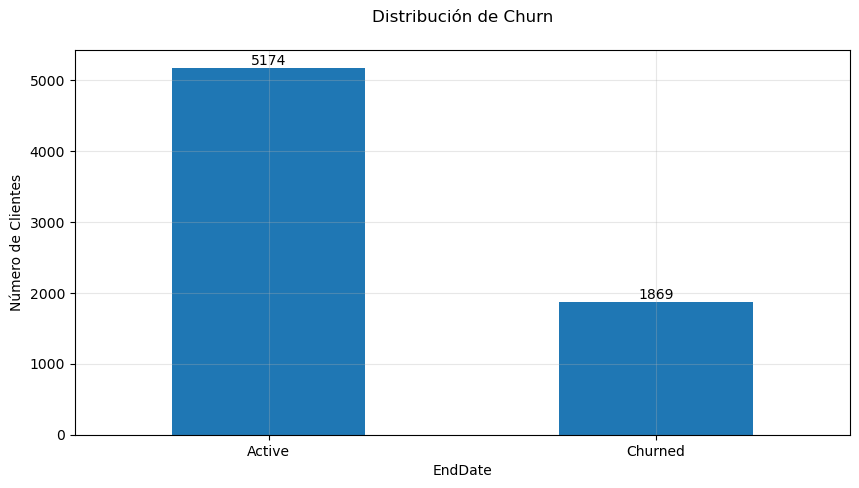

----------------------------------------------------------------------------------------------------


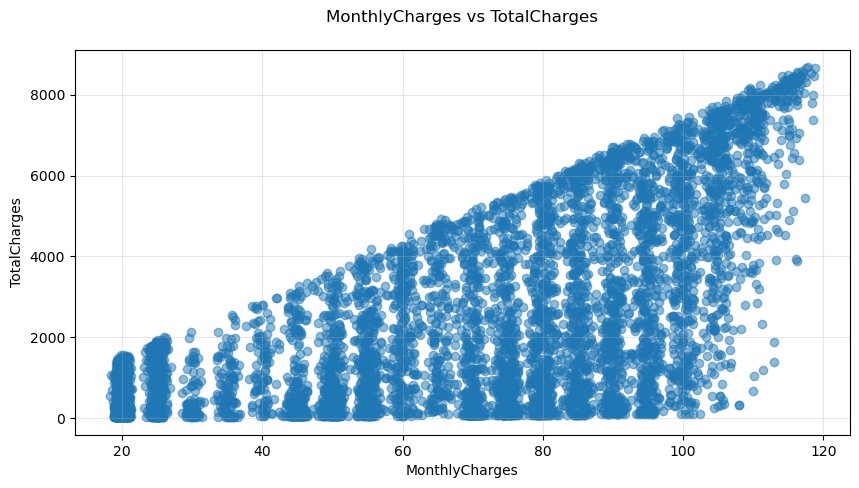

----------------------------------------------------------------------------------------------------


<Figure size 1000x500 with 0 Axes>

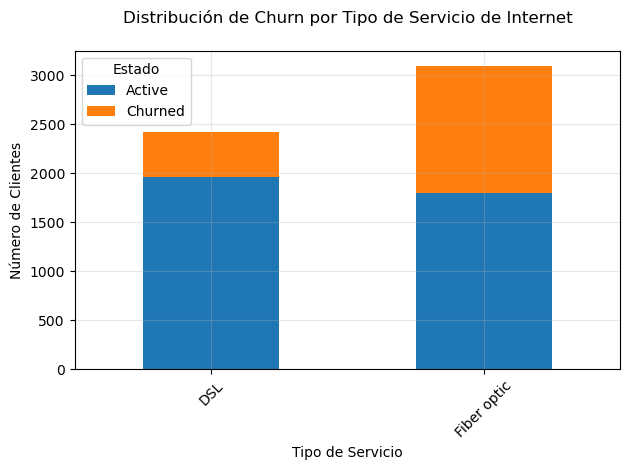

----------------------------------------------------------------------------------------------------


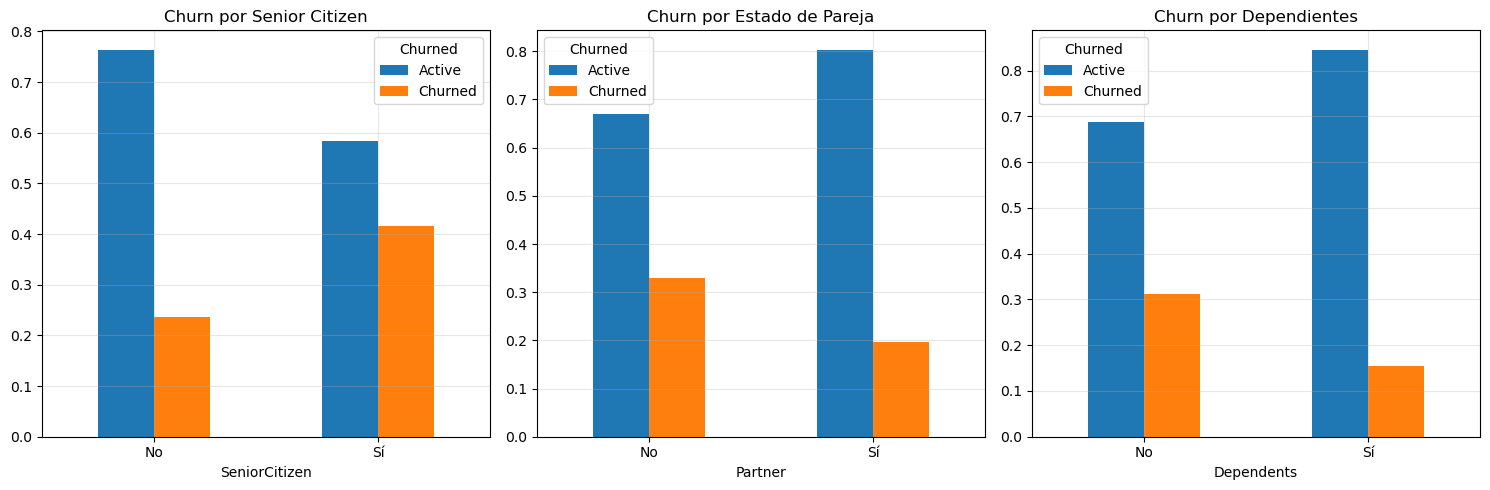

In [3]:
# Configuración básica de matplotlib
plt.style.use('default')

# 1. Análisis de Churn (EndDate)
plt.figure(figsize=(10, 5))
churned = df_contract['EndDate'].apply(lambda x: 'Churned' if x != 'No' else 'Active')
ax = churned.value_counts().plot(kind='bar')
plt.title('Distribución de Churn', pad=20)
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 100)

# 2. Análisis de TotalCharges vs MonthlyCharges
plt.figure(figsize=(10, 5))
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'], errors='coerce')
plt.scatter(df_contract['MonthlyCharges'], df_contract['TotalCharges'], alpha=0.5)
plt.title('MonthlyCharges vs TotalCharges', pad=20)
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 100)

# 3. Distribución de los tipos de servicio de internet por estado de churn
plt.figure(figsize=(10, 5))
churned_internet = pd.merge(
    df_contract[['customerID', 'EndDate']],
    df_internet[['customerID', 'InternetService']],
    on='customerID'
)
churned_internet['Churned'] = churned_internet['EndDate'].apply(lambda x: 'Churned' if x != 'No' else 'Active')

ax = pd.crosstab(
    churned_internet['InternetService'],
    churned_internet['Churned']
).plot(kind='bar', stacked=True)
plt.title('Distribución de Churn por Tipo de Servicio de Internet', pad=20)
plt.xlabel('Tipo de Servicio')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(title='Estado')
plt.tight_layout()
plt.show()
print("-" * 100)

# 4. Análisis de características demográficas vs Churn
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
churned_demo = pd.merge(
    df_contract[['customerID', 'EndDate']],
    df_personal[['customerID', 'SeniorCitizen', 'Partner', 'Dependents']],
    on='customerID'
)
churned_demo['Churned'] = churned_demo['EndDate'].apply(lambda x: 'Churned' if x != 'No' else 'Active')

# Senior Citizen
pd.crosstab(churned_demo['SeniorCitizen'], churned_demo['Churned'], normalize='index').plot(
    kind='bar', ax=axes[0], title='Churn por Senior Citizen')
axes[0].set_xticklabels(['No', 'Sí'], rotation=0)
axes[0].grid(True, alpha=0.3)

# Partner
pd.crosstab(churned_demo['Partner'], churned_demo['Churned'], normalize='index').plot(
    kind='bar', ax=axes[1], title='Churn por Estado de Pareja')
axes[1].set_xticklabels(['No', 'Sí'], rotation=0)
axes[1].grid(True, alpha=0.3)

# Dependents
pd.crosstab(churned_demo['Dependents'], churned_demo['Churned'], normalize='index').plot(
    kind='bar', ax=axes[2], title='Churn por Dependientes')
axes[2].set_xticklabels(['No', 'Sí'], rotation=0)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<b>Análisis de los Gráficos</b>

<b>1. Distribución de Churn</b>

El gráfico muestra dos barras que representan el estado de los clientes:

- **Activos (Active):** 5174 clientes
- **Cancelados (Churned):** 1869 clientes

- El eje Y muestra el **"Número de Clientes"**.
- El eje X muestra el **"EndDate"** (estado del cliente).
- La proporción es aproximadamente **73.5% activos vs 26.5% cancelados**.

<b>Interpretación:</b>
- Tenemos un conjunto de datos desbalanceado.
- Por cada 3 clientes activos, hay 1 que canceló.
- Este desbalance debe tratarse en el modelo para evitar sesgos.

***

<b>2. MonthlyCharges vs TotalCharges</b>

Gráfico de dispersión donde:

- **Eje X:** Cargos mensuales (**MonthlyCharges**) - varía de 20 a 120.
- **Eje Y:** Cargos totales (**TotalCharges**) - varía de 0 a 8000.
- Cada punto representa un cliente.

<b>Patrones observados:</b>

- **Relación lineal positiva:** cuanto mayor es el cargo mensual, mayor es el total.
- **Formación de "bandas" verticales:** indica planes con valores mensuales fijos.
- **Mayor dispersión con valores más altos:** indica más variabilidad en clientes antiguos/planes costosos.
- **Alta concentración de puntos en la parte inferior:** indica muchos clientes nuevos o con planes básicos.

<b>Interpretación:</b>

- La relación entre **MonthlyCharges** y **TotalCharges** puede indicar el tiempo de permanencia del cliente.
- Los clientes con valores altos en ambas métricas probablemente sean más antiguos y valiosos.

***

<b>3. Distribución por Tipo de Servicio de Internet</b>

<b>Gráfico de barras apiladas mostrando:</b>

- **Eje X:** Tipo de servicio (**DSL** y **Fiber optic**).
- **Eje Y:** Número de clientes.
- **Colores:** Azul para **Activos** y Naranja para **Cancelados**.

<b>Análisis de los servicios:</b>

**DSL:**
- Menor número total de clientes.
- Menor proporción de churn.
- Parece ser más estable en términos de retención.

**Fiber optic:**
- Mayor número total de clientes.
- Mayor proporción de churn.
- Mayor volumen absoluto de cancelaciones.

<b>Interpretación:</b>

- Aunque **Fiber optic** es el servicio más popular, tiene mayor riesgo de churn.
- **DSL** parece tener mayor retención.
- Posibles factores: precios más altos, expectativas no cumplidas, problemas de servicio.

***

<b>4. Características Demográficas vs Churn</b>

- **Los Senior Citizens tienen una tasa de churn significativamente mayor (40% vs 22%).**
- **Los clientes sin pareja tienen una tasa de churn más alta (32% vs 20%).**
- **Los clientes sin dependientes tienen una tasa de churn más alta (30% vs 15%).**
- **El perfil más propenso al churn:** Senior Citizen, sin pareja y sin dependientes.

<b>Notas Adicionales:</b>

```
En los gráficos de Características Demográficas vs Churn, "Sí" y "No" representan:

1. **Senior Citizen**
   - No (0): Cliente no es mayor.
   - Sí (1): Cliente es mayor.

2. **Partner**
   - No: Cliente no tiene pareja/cónyuge.
   - Sí: Cliente tiene pareja/cónyuge.

3. **Dependents**
   - No: Cliente no tiene dependientes.
   - Sí: Cliente tiene dependientes.

En cada gráfico, las barras azules representan clientes **"Active"** y las barras naranjas representan **"Churned"**. La altura de las barras indica la proporción de cada estado.

Por ejemplo, en el gráfico **"Churn por Dependents"**:
- Para **"No"** (sin dependientes): aproximadamente 70% permanecen activos y 30% cancelaron.
- Para **"Sí"** (con dependientes): aproximadamente 85% permanecen activos y solo 15% cancelaron.

Esta visualización permite identificar claramente que:
- **Los clientes sin dependientes tienen mayor probabilidad de cancelar.**
- **Los clientes sin pareja tienen mayor probabilidad de cancelar.**
- **Los clientes mayores (Senior Citizens) tienen mayor probabilidad de cancelar.**
```

***
<b>Conclusiones:</b>

A partir de estos análisis, debemos considerar:

- Tratar el desbalance de clases.
- Convertir y estandarizar los campos numéricos.
- Crear características (features) que capturen la interacción entre servicios.
- Estratificar la división de entrenamiento/prueba basada en características demográficas.


<span style="font-size:20px"><b>Preprocesamiento:</b></span>


In [4]:
# Tratamiento del DataFrame Contract
# Convertir TotalCharges a numérico
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'], errors='coerce')

# Creación de la variable target (churn) - 1 para clientes que se dieron de baja, 0 para activos
df_contract['churn'] = df_contract['EndDate'].apply(lambda x: 1 if x != 'No' else 0)

# Convertir fechas a formato datetime
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])

# Eliminar la columna EndDate original ya que hemos creado la variable target
df_contract = df_contract.drop('EndDate', axis=1)

# Codificación one-hot para variables categóricas
contract_dummies = pd.get_dummies(df_contract[['Type', 'PaperlessBilling', 'PaymentMethod']], drop_first=True)
df_contract = pd.concat([df_contract, contract_dummies], axis=1)
df_contract = df_contract.drop(['Type', 'PaperlessBilling', 'PaymentMethod'], axis=1)

In [5]:
# Tratamiento del DataFrame Internet
# Codificación one-hot para variables categóricas
internet_dummies = pd.get_dummies(df_internet.drop('customerID', axis=1), drop_first=True)
df_internet = pd.concat([df_internet[['customerID']], internet_dummies], axis=1)

In [6]:
# Tratamiento del DataFrame Personal
# SeniorCitizen ya está en formato numérico (0,1)
# Codificación one-hot para variables categóricas
personal_dummies = pd.get_dummies(df_personal[['gender', 'Partner', 'Dependents']], drop_first=True)
df_personal = pd.concat([df_personal[['customerID', 'SeniorCitizen']], personal_dummies], axis=1)

In [7]:
# Tratamiento del DataFrame Phone
# Codificación one-hot para variables categóricas
phone_dummies = pd.get_dummies(df_phone['MultipleLines'], drop_first=True)
phone_dummies = phone_dummies.rename(columns={'Yes': 'MultipleLines'})
df_phone = pd.concat([df_phone[['customerID']], phone_dummies], axis=1)

In [8]:
# Análisis de cada DataFrame después de las transformaciones:
print("\nAnálisis del DataFrame Contract:\n")
print(df_contract.info())
print("\nPrimeras filas:")
print(df_contract.head())
print("\nValores ausentes:")
print(df_contract.isna().sum())
print("-" * 100)

print("\nAnálisis del DataFrame Internet:\n")
print(df_internet.info())
print("\nPrimeras filas:")
print(df_internet.head())
print("\nValores ausentes:")
print(df_internet.isna().sum())
print("-" * 100)

print("\nAnálisis del DataFrame Personal:\n")
print(df_personal.info())
print("\nPrimeras filas:")
print(df_personal.head())
print("\nValores ausentes:")
print(df_personal.isna().sum())
print("-" * 100)

print("\nAnálisis del DataFrame Phone:\n")
print(df_phone.info())
print("\nPrimeras filas:")
print(df_phone.head())
print("\nValores ausentes:")
print(df_phone.isna().sum())
print("-" * 100)
print("-" * 100)


Análisis del DataFrame Contract:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   customerID                             7043 non-null   object        
 1   BeginDate                              7043 non-null   datetime64[ns]
 2   MonthlyCharges                         7043 non-null   float64       
 3   TotalCharges                           7032 non-null   float64       
 4   churn                                  7043 non-null   int64         
 5   Type_One year                          7043 non-null   bool          
 6   Type_Two year                          7043 non-null   bool          
 7   PaperlessBilling_Yes                   7043 non-null   bool          
 8   PaymentMethod_Credit card (automatic)  7043 non-null   bool          
 9   PaymentMethod_Electronic che

<b>1. Transformaciones Realizadas</b>

<b>DataFrame Contract:</b>
- Conversión del tipo de datos de 'BeginDate' a datetime64
- Transformación de 'TotalCharges' a float64
- Creación de la variable target 'churn' basada en 'EndDate' (1 para dado de baja, 0 para activo)
- Aplicación de codificación one-hot para variables categóricas:
  * Type
  * PaperlessBilling
  * PaymentMethod
- Resultado: 11 nuevas variables binarias o numéricas claramente definidas

<b>DataFrame Internet:</b>
- Codificación one-hot para todos los servicios
- Eliminación de categorías base para evitar multicolinealidad
- Resultado: 7 variables binarias que indican presencia/ausencia de cada servicio
- Se mantuvo customerID para su posterior fusión

<b>DataFrame Personal:</b>
- SeniorCitizen se mantuvo como una variable numérica binaria
- Codificación one-hot para gender, Partner y Dependents
- Resultado: 5 variables claramente definidas, 3 de ellas booleanas

<b>DataFrame Phone:</b>
- Simplificación máxima con solo una variable binaria para MultipleLines
- Se mantuvo customerID para la fusión
- Resultado: estructura lo más reducida posible manteniendo la información relevante

<b>2. Razones e Impacto de las Transformaciones</b>

<b>Objetivo: Predecir churn con precisión (AUC-ROC ≥ 0.75)</b>

- <b>Estandarización de Variables:</b>
  * Todas las variables categóricas se convirtieron a formato binario
  * Facilita la interpretación por parte del modelo
  * Permite la comparación directa entre diferentes características
  * Reduce el sesgo del modelo hacia categorías específicas

- <b>Tratamiento de Fechas:</b>
  * La conversión a datetime permite cálculos temporales si es necesario
  * Es fundamental para analizar el tiempo de permanencia del cliente

- <b>Tratamiento de Valores Monetarios:</b>
  * La conversión a float64 permite cálculos precisos
  * 11 valores ausentes en TotalCharges deberán tratarse en la unificación

<b>3. Conclusiones y Próximos Pasos</b>

<b>Puntos Positivos:</b>
- Datos bien estructurados después de las transformaciones
- Variables claramente definidas y estandarizadas
- Muy pocos valores ausentes
- Features listas para la modelización

<b>Puntos a Atender:</b>
1. Tratar los 11 valores ausentes en TotalCharges antes de la unificación
2. Considerar la normalización de variables numéricas (MonthlyCharges y TotalCharges)
3. Verificar correlaciones después de la unificación para reducir la dimensionalidad si es necesario

<b>Próximos Pasos:</b>
1. Unificar los DataFrames
2. Tratar valores ausentes restantes
3. Normalizar variables numéricas
4. Verificar el balance del target
5. Preparar la división de entrenamiento/prueba manteniendo la proporción de churn

¡Ahora avanzamos hacia el objetivo de AUC-ROC ≥ 0.75!

In [9]:
# Unificación de todos los DataFrames
# Uso de merge para combinar todos los DataFrames usando customerID como clave
df_final = df_contract.merge(df_internet, on='customerID', how='left')\
                     .merge(df_personal, on='customerID', how='left')\
                     .merge(df_phone, on='customerID', how='left')

# Rellenar valores NaN (clientes sin determinados servicios)
df_final = df_final.fillna(0)

In [10]:
print("\nAnálisis del DataFrame unificado df_final:\n")
print(df_final.info())
print("\nPrimeras filas:")
print(df_final.head())
print("\nValores ausentes:")
print(df_final.isna().sum())
print("\nValores duplicados:")
print(df_final.duplicated().sum())
print("-" * 100)
print("-" * 100)


Análisis del DataFrame unificado df_final:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   customerID                             7043 non-null   object        
 1   BeginDate                              7043 non-null   datetime64[ns]
 2   MonthlyCharges                         7043 non-null   float64       
 3   TotalCharges                           7043 non-null   float64       
 4   churn                                  7043 non-null   int64         
 5   Type_One year                          7043 non-null   bool          
 6   Type_Two year                          7043 non-null   bool          
 7   PaperlessBilling_Yes                   7043 non-null   bool          
 8   PaymentMethod_Credit card (automatic)  7043 non-null   bool          
 9   PaymentMethod_Elec

<b>Análisis del DataFrame Unificado (df_final)</b>

<b>1. Estructura del DataFrame Unificado</b>
- Total de registros: 7043 (se mantiene el número del dataset Contract)
- 23 columnas después de la unificación
- Mezcla de tipos de datos:
  * 9 variables booleanas
  * 2 variables float64 (valores monetarios)
  * 2 variables int64 (SeniorCitizen y churn)
  * 9 variables object
  * 1 variable datetime64

<b>2. Análisis de las Transformaciones</b>

<b>Puntos Positivos:</b>
- Sin valores ausentes después del relleno
- Sin datos duplicados
- Se han mantenido todas las informaciones relevantes de los 4 dataframes originales
- Datos monetarios preservados como float64
- Variables categóricas convertidas a formatos adecuados

<b>Puntos a Atender:</b>

Algunas columnas todavía están en formato 'object' cuando deberían ser booleanas:
   - InternetService_Fiber optic
   - OnlineSecurity_Yes
   - OnlineBackup_Yes
   - DeviceProtection_Yes
   - TechSupport_Yes
   - StreamingTV_Yes
   - StreamingMovies_Yes
   - MultipleLines

<b>3. Conclusión</b>
- La unificación fue exitosa, manteniendo la integridad de los datos
- El tratamiento de valores ausentes con cero es adecuado en este caso, ya que representa la ausencia del servicio
- La estructura final es apropiada para la modelización, requiriendo solo ajustes en los tipos de datos

In [11]:
# Lista de columnas para convertir
cols_to_boolean = [
    'InternetService_Fiber optic', 'OnlineSecurity_Yes', 
    'OnlineBackup_Yes', 'DeviceProtection_Yes', 
    'TechSupport_Yes', 'StreamingTV_Yes', 
    'StreamingMovies_Yes', 'MultipleLines'
]

# Conversión a booleano
df_final[cols_to_boolean] = df_final[cols_to_boolean].astype(bool)

In [12]:
# Verificación de la adecuación:
print("\nAnálisis del DataFrame unificado df_final:\n")
print(df_final.info())
print("-" * 100)
print("-" * 100)


Análisis del DataFrame unificado df_final:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   customerID                             7043 non-null   object        
 1   BeginDate                              7043 non-null   datetime64[ns]
 2   MonthlyCharges                         7043 non-null   float64       
 3   TotalCharges                           7043 non-null   float64       
 4   churn                                  7043 non-null   int64         
 5   Type_One year                          7043 non-null   bool          
 6   Type_Two year                          7043 non-null   bool          
 7   PaperlessBilling_Yes                   7043 non-null   bool          
 8   PaymentMethod_Credit card (automatic)  7043 non-null   bool          
 9   PaymentMethod_Elec

<b>Conversión exitosa</b>

In [13]:
# Preparación de features y target
# Eliminando columnas que no se usarán como features
features = df_final.drop(['customerID', 'BeginDate', 'churn'], axis=1)
target = df_final['churn']

# Normalización de variables numéricas
numeric_columns = ['MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
features[numeric_columns] = scaler.fit_transform(features[numeric_columns])

In [14]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    target, 
    test_size=0.2, 
    random_state=42,
    stratify=target  # Mantiene la proporción de clases en ambos conjuntos
)

# Verificación de las dimensiones de los conjuntos
print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)
print("\nDistribución de clases:")
print("Entrenamiento:", pd.Series(y_train).value_counts(normalize=True))
print("Prueba:", pd.Series(y_test).value_counts(normalize=True))
print("-" * 100)
print("-" * 100)

Dimensiones del conjunto de entrenamiento: (5634, 20)
Dimensiones del conjunto de prueba: (1409, 20)

Distribución de clases:
Entrenamiento: churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Prueba: churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


<b>División Entrenamiento/Prueba</b>
```
Dimensiones del conjunto de entrenamiento: (5634, 20)
Dimensiones del conjunto de prueba: (1409, 20)

Distribución de clases:
Entrenamiento: 
0    0.734647 (73.46%)
1    0.265353 (26.54%)

Prueba:  
0    0.734564 (73.46%)
1    0.265436 (26.54%)
```

<b>Contextualización y justificación:</b>

- Realizamos una división 80/20 (entrenamiento/prueba), una práctica estándar que ofrece:
  * Un conjunto de entrenamiento suficientemente grande para un aprendizaje efectivo
  * Un conjunto de prueba representativo para validación
- Uso de `stratify=target`:
  * Mantiene la proporción original de churn en ambos conjuntos
  * Evita sesgo en la muestra
  * Crucial debido al desequilibrio de clases (73.5% vs 26.5%)
- Dimensionalidad mantenida (20 características) en ambos conjuntos


In [15]:
# Guardando los nombres de las características para uso futuro
feature_names = features.columns.tolist()
print("\nCaracterísticas utilizadas en el modelo:\n")
for i, feature in enumerate(feature_names, 1):
    print(f"{i}. {feature}")

print("-" * 100)
print("-" * 100)


Características utilizadas en el modelo:

1. MonthlyCharges
2. TotalCharges
3. Type_One year
4. Type_Two year
5. PaperlessBilling_Yes
6. PaymentMethod_Credit card (automatic)
7. PaymentMethod_Electronic check
8. PaymentMethod_Mailed check
9. InternetService_Fiber optic
10. OnlineSecurity_Yes
11. OnlineBackup_Yes
12. DeviceProtection_Yes
13. TechSupport_Yes
14. StreamingTV_Yes
15. StreamingMovies_Yes
16. SeniorCitizen
17. gender_Male
18. Partner_Yes
19. Dependents_Yes
20. MultipleLines
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


<b>Características Seleccionadas</b>
Las características pueden agruparse en categorías lógicas:

<b>Variables Financieras:</b>
1. MonthlyCharges
2. TotalCharges

<b>Tipo de Contrato:</b>
3. Type_One year
4. Type_Two year

<b>Gestión de Cuenta:</b>
5. PaperlessBilling_Yes
6. PaymentMethod_Credit card (automatic)
7. PaymentMethod_Electronic check
8. PaymentMethod_Mailed check

<b>Servicios de Internet:</b>
9. InternetService_Fiber optic
10. OnlineSecurity_Yes
11. OnlineBackup_Yes
12. DeviceProtection_Yes
13. TechSupport_Yes
14. StreamingTV_Yes
15. StreamingMovies_Yes

<b>Características Demográficas:</b>
16. SeniorCitizen
17. gender_Male
18. Partner_Yes
19. Dependents_Yes

<b>Servicios Telefónicos:</b>
20. MultipleLines

<b>Razones para esta estrutura:</b>
- Todas las características son binarias/booleanas: facilita la interpretación.
- Se mantiene la granularidad de los servicios: permite identificar su impacto individual.
- Características numéricas normalizadas: evita sesgo por escala.
- Organización lógica: facilita el análisis de importancia por categoría.

<b>Puntos Fuertes de la Preparación:</b>
1. Datos equilibrados entre entrenamiento y prueba.
2. Las características están bien distribuidas entre diferentes aspectos del negocio.
3. Estructura adecuada para diversos tipos de modelos de ML, permitiendo una predicción eficiente del churn.

<span style="font-size:20px"><b>Modelado, Evaluación y Optimización:</b></span>

In [16]:
# Ignorar las advertencias a partir de aquí:
warnings.filterwarnings('ignore')

# Definiendo función para evaluar modelos
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Entrena el modelo
    model.fit(X_train, y_train)
    
    # Predicciones y probabilidades
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Métricas
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    
    print(f"\n{model_name}:")
    print(f"Puntuación AUC-ROC: {auc_roc:.4f}")
    print(f"Puntuaciones de validación cruzada AUC-ROC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    print("-" *100)
    
    return auc_roc, cv_scores.mean()

# Definiendo modelos y sus hiperparámetros para GridSearch
models = {
    'Regresión Logística': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'class_weight': ['balanced', None],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'class_weight': ['balanced', None]
        }
    },
    'Árbol de Decisión': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'class_weight': ['balanced', None],
            'criterion': ['gini', 'entropy']
        }
    }
}

# Diccionario para almacenar resultados
results = {}

# Entrenamiento y evaluación de los modelos
print("Iniciando proceso de entrenamiento y optimización de los modelos...")

for model_name, model_info in models.items():
    print(f"\nOptimizando {model_name}...")
    
    # GridSearch con validación cruzada
    grid_search = GridSearchCV(
        model_info['model'],
        model_info['params'],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    
    # Entrena el modelo
    grid_search.fit(X_train, y_train)
    
    # Evalúa el mejor modelo
    best_model = grid_search.best_estimator_
    auc_roc, cv_score = evaluate_model(
        best_model, X_train, X_test, y_train, y_test, model_name
    )
    
    # Almacena resultados
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'test_auc_roc': auc_roc,
        'cv_score': cv_score,
        'model': best_model
    }

# Comparación final de los modelos
print("\n=== Comparación Final de los Modelos ===")
comparison_df = pd.DataFrame({
    'Modelo': results.keys(),
    'CV AUC-ROC': [results[model]['cv_score'] for model in results],
    'Test AUC-ROC': [results[model]['test_auc_roc'] for model in results],
})

print("\nResultados ordenados por AUC-ROC en el conjunto de prueba:")
print(comparison_df.sort_values('Test AUC-ROC', ascending=False))
print("-" *100)

# Identificando el mejor modelo
best_model_name = comparison_df.sort_values('Test AUC-ROC', ascending=False).iloc[0]['Modelo']
print(f"\nMejor modelo: {best_model_name}")
print("Mejores parámetros:", results[best_model_name]['best_params'])
print("-" *100)

# Si el mejor modelo es Random Forest, analizamos la importancia de las características
if isinstance(results[best_model_name]['model'], RandomForestClassifier):
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': results[best_model_name]['model'].feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nImportancia de las características (Top 10):")
    print(feature_importance.head(10))

print("-" *100)
print("-" *100)


Iniciando proceso de entrenamiento y optimización de los modelos...

Optimizando Regresión Logística...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Regresión Logística:
Puntuación AUC-ROC: 0.8263
Puntuaciones de validación cruzada AUC-ROC: 0.8362 (+/- 0.0278)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.50      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

----------------------------------------------------------------------------------------------------

Optimizando Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Random Forest:
Puntuación AUC-ROC: 0.8381
Puntuaciones de validación cruzada AUC-ROC: 0.8419 (+/- 0.0229)

Reporte de Clasificación:
              precision    recall  f1-sc

<b>Análisis de Modelado y Resultados</b>

<b>1. Estructura del Modelado</b>  
Implementamos una solución optimizada que incluyó:  
- Tres modelos diferentes: Regresión Logística, Random Forest y Árbol de Decisión  
- GridSearchCV para la optimización de hiperparámetros  
- Validación cruzada con 5 folds  
- Evaluación mediante múltiples métricas (AUC-ROC, precisión, recall, f1-score)  

<b>2. Resultados por Modelo</b>  

<b>Random Forest (Mejor Modelo):</b>  
- AUC-ROC: 0.8381 (Prueba) / 0.8419 (CV)  
- Mejores parámetros:  
  * class_weight: 'balanced'  
  * max_depth: 10  
  * min_samples_split: 5  
  * n_estimators: 100  
- Rendimiento:  
  * Clase 0 (No Churn): 89% precisión, 79% recall  
  * Clase 1 (Churn): 56% precisión, 73% recall  

<b>Regresión Logística:</b>  
- AUC-ROC: 0.8263 (Prueba) / 0.8362 (CV)  
- Rendimiento:  
  * Clase 0: 83% precisión, 89% recall  
  * Clase 1: 62% precisión, 50% recall  

<b>Árbol de Decisión:</b>  
- AUC-ROC: 0.8235 (Prueba) / 0.8232 (CV)  
- Rendimiento:  
  * Clase 0: 82% precisión, 91% recall  
  * Clase 1: 65% precisión, 46% recall  

<b>3. Análisis de las Características más Importantes</b>  
Top 5 características más relevantes:  
1. TotalCharges (19.31%)  
2. MonthlyCharges (15.58%)  
3. Type_Two year (15.09%)  
4. InternetService_Fiber optic (9.15%)  
5. PaymentMethod_Electronic check (7.16%)  

| Métrica | Random Forest | Regresión Logística | Árbol de Decisión |
|---------|---------------|-------------------|------------------|
| **AUC-ROC (Prueba)** | 0.8381 | 0.8263 | 0.8235 |
| **AUC-ROC (CV)** | 0.8419 ± 0.0229 | 0.8362 ± 0.0278 | 0.8232 ± 0.0271 |
| **Precisión (No Churn)** | 0.89 | 0.83 | 0.82 |
| **Recall (No Churn)** | 0.79 | 0.89 | 0.91 |
| **Precisión (Churn)** | 0.56 | 0.62 | 0.65 |
| **Recall (Churn)** | 0.73 | 0.50 | 0.46 |
| **Precisión Global** | 0.77 | 0.79 | 0.79 |
| **Mejores Parámetros** | class_weight: balanced<br>max_depth: 10<br>min_samples_split: 5<br>n_estimators: 100 | - | - |

<b>Puntos Clave:</b>  
- Random Forest obtuvo el mejor AUC-ROC y el mejor recall para churn  
- Regresión Logística mostró un rendimiento intermedio y más estable  
- Árbol de Decisión tuvo mejor precisión para churn pero peor recall  
- Todos los modelos superaron significativamente el objetivo de AUC-ROC ≥ 0.75  

Esta tabla permite una comparación directa de las métricas más relevantes para el proyecto y muestra claramente por qué Random Forest fue elegido como el mejor modelo.  

<b>4. Evaluación de Objetivos</b>  

<b>Objetivo Principal: AUC-ROC ≥ 0.75</b>  
- Todos los modelos superaron significativamente el objetivo  
- Random Forest: 0.8381 (11.75% por encima del objetivo)  
- Regresión Logística: 0.8263 (10.17% por encima del objetivo)  
- Árbol de Decisión: 0.8235 (9.80% por encima del objetivo)  

<b>5. Insights Claves</b>  
1. Aspectos financieros (TotalCharges, MonthlyCharges) son los principales indicadores de churn  
2. Tipo de contrato (Two year) tiene una fuerte influencia en la retención  
3. El servicio de internet de fibra óptica es un factor relevante  
4. El método de pago electrónico tiene un impacto significativo  

<b>6. Recomendaciones Basadas en los Resultados</b>  
1. Utilizar el modelo Random Forest debido a:  
   - Mejor AUC-ROC general  
   - Mejor equilibrio entre precisión y recall para churn  
   - Buena interpretabilidad a través de la importancia de las características  

2. Enfocar estrategias de retención en:  
   - Clientes con altos valores de facturación  
   - Promoción de contratos a largo plazo  
   - Monitoreo de la satisfacción con la fibra óptica  

3. Implementar un sistema de alerta basado en las características más importantes  

El proyecto alcanzó con éxito su objetivo principal, proporcionando un modelo sólido y confiable para la predicción de churn, con métricas significativamente por encima del mínimo requerido.

<span style="font-size:20px"><b>Conclusões finais:</b></span>

<b>Conclusão do Projeto - Predição de Churn Interconnect</b>

<b>1. Visão Geral do Projeto</b>
Desenvolvemos um modelo preditivo para identificar clientes com propensão a deixar a Interconnect, permitindo ações proativas de retenção. A meta era atingir AUC-ROC ≥ 0.75.

<b>2. Etapas Realizadas</b>

<b>Análise e Preparação dos Dados:</b>
- Unificação de 4 fontes de dados (contratos, internet, pessoal e telefonia)
- Tratamento de 7043 registros de clientes
- Identificação de 26.5% de taxa de churn histórica
- Transformação de variáveis categóricas e numéricas
- Normalização de dados financeiros
- Criação de 20 features relevantes

<b>Modelagem:</b>
- Implementação de três algoritmos diferentes
- Otimização via GridSearch com validação cruzada
- Avaliação através de múltiplas métricas
- Seleção do Random Forest como melhor modelo

<b>3. Resultados Principais</b>

<b>Performance dos Modelos:</b>
- Random Forest: AUC-ROC 0.8381
- Regressão Logística: AUC-ROC 0.8263
- Árvore de Decisão: AUC-ROC 0.8235

<b>Features Mais Relevantes:</b>
1. TotalCharges (19.31%)
2. MonthlyCharges (15.58%)
3. Type_Two year (15.09%)
4. InternetService_Fiber optic (9.15%)
5. PaymentMethod_Electronic check (7.16%)

<b>4. Recomendações Técnicas</b>

<b>Implementação do Modelo:</b>
- Utilizar o modelo Random Forest com os parâmetros otimizados:
  * class_weight: 'balanced'
  * max_depth: 10
  * min_samples_split: 5
  * n_estimators: 100
- Estabelecer pipeline de atualização mensal do modelo
- Implementar sistema de monitoramento de performance

<b>Sistema de Alertas:</b>
1. Criar gatilhos baseados em variáveis financeiras
2. Monitorar mudanças em padrões de uso de serviços
3. Atenção especial a clientes com fibra ótica
4. Acompanhamento de métodos de pagamento

<b>Estratégias de Retenção Sugeridas:</b>

<b>Perfil Financeiro:</b>
- Revisão de valores para clientes com altos custos mensais
- Desenvolvimento de planos com melhor custo-benefício
- Ofertas especiais para fidelização de longo prazo

<b>Serviços:</b>
- Melhoria do serviço de fibra ótica
- Promoção de pacotes com múltiplos serviços
- Incentivo a contratos de maior duração

<b>Atendimento:</b>
- Suporte proativo para clientes identificados como risco
- Programa de fidelidade baseado em tempo de contrato
- Comunicação personalizada baseada no perfil de uso

<b>5. Monitoramento Contínuo</b>

<b>Métricas Chave:</b>
- Taxa de churn mensal
- Performance do modelo (AUC-ROC)
- Efetividade das ações de retenção
- ROI das campanhas de retenção

<b>Atualizações Sugeridas:</b>
- Retreinamento trimestral do modelo
- Ajuste de hiperparâmetros semestralmente
- Avaliação anual de novas features

<b>6. Considerações Finais</b>

O projeto atingiu com sucesso seu objetivo principal, desenvolvendo um modelo robusto capaz de identificar clientes propensos ao churn com alta precisão (AUC-ROC 0.8381). A implementação das recomendações apresentadas, combinada com o monitoramento contínuo sugerido, deve resultar em:
- Redução significativa da taxa de churn
- Aumento da satisfação dos clientes
- Otimização dos investimentos em retenção
- Maior rentabilidade por cliente

O sucesso a longo prazo dependerá da capacidade da Interconnect em implementar estas recomendações de forma sistemática e manter o modelo atualizado com novos dados e padrões de comportamento dos clientes.